## Install TnesorFlow 2.0

In [0]:
pip install tf-nightly-2.0-preview

     |████████████████████████████████| 91.3MB 475kB/s 
     |████████████████████████████████| 450kB 40.0MB/s 
     |████████████████████████████████| 3.8MB 30.8MB/s 


In [0]:
import tensorflow as tf
print(tf.__version__)
assert tf.__version__.startswith('2')

2.0.0-dev20190924


In [0]:
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential

## 1a: Plot loss and accuracy

produce plots showing loss and accuracy as a function of epochs on training and validation data (it's fine to use x_test and y_test as validation data for this assignment). To do so, you will need to add validation data to the call for model.fit, and capture the results in a history object. 

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   # the data, shuffled and split between tran and test sets
x_train, x_test = x_train / 255.0, x_test / 255.0


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 1. create a history object to store the results of model.fit
# history = model.fit(...)``
# 2. add another parameter to model.fit for validation data
# https://keras.io/models/sequential/
history = model.fit(x_train, 
           y_train,
           epochs=10,
           validation_data=(x_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.4664 - accuracy: 0.8781 - val_loss: 0.3071 - val_accuracy: 0.9139
Epoch 2/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3038 - accuracy: 0.9153 - val_loss: 0.2842 - val_accuracy: 0.9206
Epoch 3/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2838 - accuracy: 0.9203 - val_loss: 0.2821 - val_accuracy: 0.9206
Epoch 4/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2734 - accuracy: 0.9235 - val_loss: 0.2706 - val_accuracy: 0.9264
Epoch 5/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2670 - accuracy: 0.9254 - val_loss: 0.2682 - val_accuracy: 0.9256
Epoch 6/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2621 - accuracy: 0.9270 - val_loss: 0.2648 - val_accuracy: 0.9270
Epoch 7/10
60000/60000 [==============================] 

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

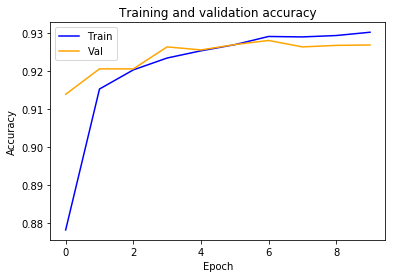

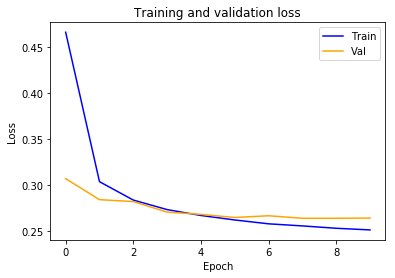

In [0]:
# A plotting function you can reuse
def plot(history):
  
  # The history object contains results on the training and test
  # sets for each epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get the number of epochs
  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  
plot(history)


# the linear model accuracy
loss_test, acc_test = model.evaluate(x_test, y_test)   #将测试的结果赋值给 loss_test, acc_test

print('\n \n \n')
print('\nTest accuracy:', acc_test)


## 1b: Implement a neural network 

**TODO**

Creating a neural network (with a single hidden layer). Add a Dense layer with 128 units and ReLU activation. Train and evaluate your model. 

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  
  tf.keras.layers.Dense(128, activation='relu'), #128 units and ReLU activation
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)


# second model accuracy


loss_test, acc_test = model.evaluate(x_test, y_test)   #将测试的结果赋值给 loss_test, acc_test

print('\nTest accuracy:', acc_test)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2602 - accuracy: 0.9253
Epoch 2/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1134 - accuracy: 0.9662
Epoch 3/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0779 - accuracy: 0.9760
Epoch 4/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0575 - accuracy: 0.9823
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0448 - accuracy: 0.9865
Epoch 6/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0344 - accuracy: 0.9889
Epoch 7/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0274 - accuracy: 0.9915
Epoch 8/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0240 - accuracy: 0.9925
Epoch 9/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0182 - accuracy: 0.9945
Epoch 10/10
60



---






# Answer
### the test accuracy of the linear model is **0.9269**

###the test accuracy of nerual network with a Dense layer having 128 units and ReLU activation is **0.9783**

So the second model is more strong and has accurate result

---








### 1c: Implement a deep neural network 



In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # Modify me
  tf.keras.layers.Dense(128, activation='relu'), #128 units and ReLU activation
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

### 1d: Display predictions and their confidence 



1. Choose one of  models above. Use it to make predictions on the entire test set using ```model.predict```

2. **Next, identify one image from the testing set the model classifies correctly, and another that it classifies incorrectly.** Add code to display these images below, **the correct labels**, **the predicted labels**, and **the confidence scores.**

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   # the data, shuffled and split between tran and test sets
x_train, x_test = x_train / 255.0, x_test / 255.0     # every picture's pixel values fall in the range of 0 to 255, we need operate the value to 0 ot 1


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # Modify me
  tf.keras.layers.Dense(128, activation='relu'), #128 units and ReLU activation
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)    # train model 



Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2349 - accuracy: 0.9306
Epoch 2/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0966 - accuracy: 0.9701
Epoch 3/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0683 - accuracy: 0.9782
Epoch 4/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0538 - accuracy: 0.9827
Epoch 5/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0406 - accuracy: 0.9868
Epoch 6/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0345 - accuracy: 0.9887
Epoch 7/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0282 - accuracy: 0.9910
Epoch 8/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0268 - accuracy: 0.9912
Epoch 9/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0212 - accuracy: 0.9925
Epoch 10/10
60

In [0]:
predictions = model.predict(x_test)   # predict x_test set
predictions[0]

array([1.8602937e-09, 8.5252933e-12, 1.4116043e-07, 5.4912175e-07,
       6.8321081e-14, 4.1587316e-09, 6.9488929e-17, 9.9999619e-01,
       5.5236371e-10, 3.0763058e-06], dtype=float32)

In [0]:
import numpy as np

In [0]:
class_names = ['number 0', 'number 1', 'number 2', 'number 3', 'number 4',
               'number 5', 'number 6', 'number 7', 'number 8', 'number 9']

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



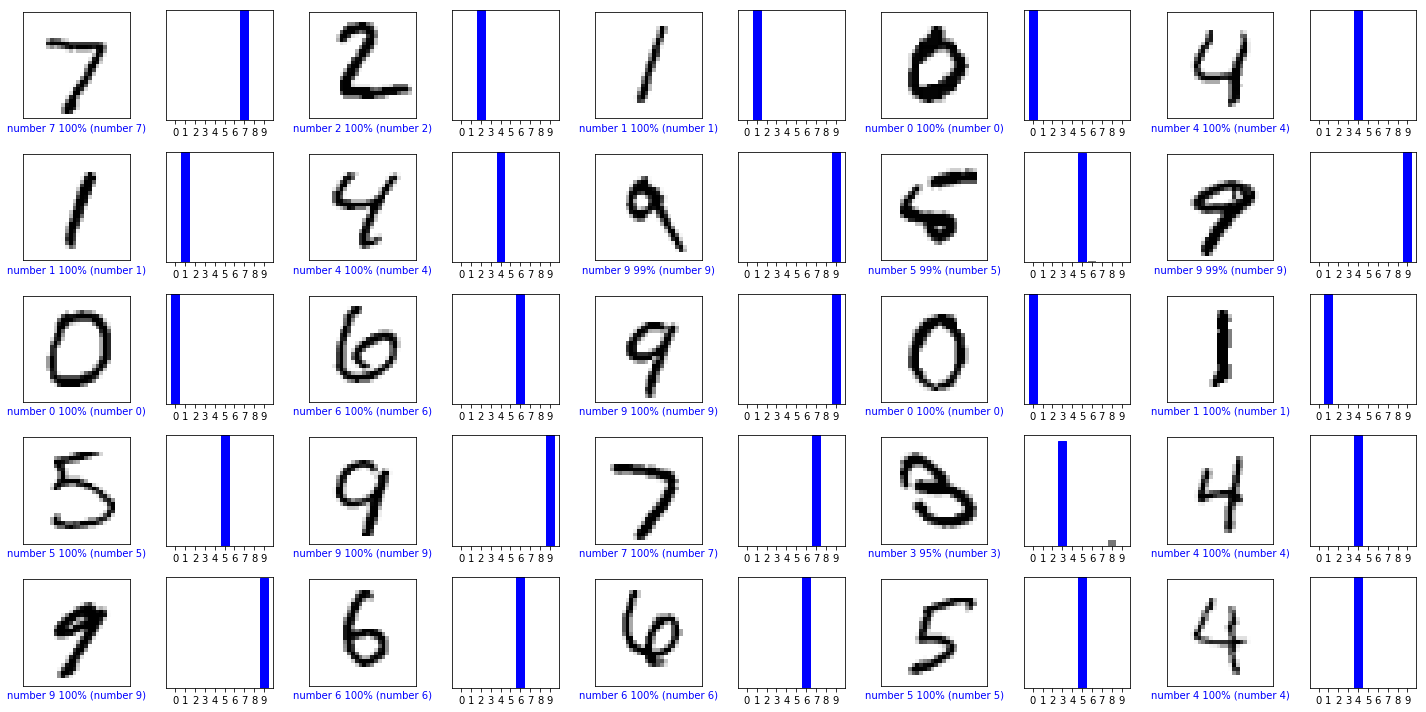

In [0]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()



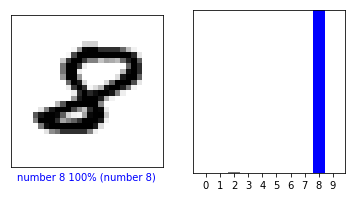

In [0]:
i = 61
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [0]:
correct = []
for i in range(10000):
  if np.argmax(predictions[i]) != y_test[i]:
    incorrect = i
  else:
    correct.append(i)
print(incorrect)  

9944


 **So just when i = 9944, the result is wrong 
we print the image and its confidence scores**

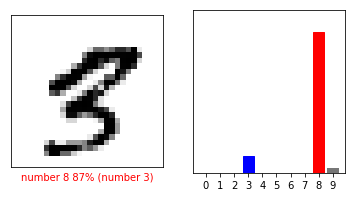

In [0]:
i = 9944
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()